# Optimisation and Solving Non-linear Equations

The package Optim (https://github.com/JuliaNLSolvers/Optim.jl) provides powerful methods for optimisation. It can easily handle objective functions with several choice variables.

The package Roots (https://github.com/JuliaMath/Roots.jl) provides methods for solving a non-linear equation (one variable, one function). If you have a system of non-linear equations, try NLsolve.jl (https://github.com/JuliaNLSolvers/NLsolve.jl).

# Load Packages

In [1]:
using Dates, Roots, Optim
           
include("printmat.jl")   

printlnPs (generic function with 2 methods)

In [3]:
using Plots

backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(600,400))
else    
    gr(size=(480,320))
    default(fmt = :svg)
end

# Defining and Plotting the Function

The next few cells define a fairly simple function and then plots it.

In [4]:
function fn1(x,c)                    #notice: the function has two arguments
  value = 2*(x - 1.1)^2 - c
  return value
end  

fn1 (generic function with 1 method)

In [5]:
x = [1,1.5] 
y = fn1.(x,0.5)                   #calling on the function
println("x and the result from the function fn1.(x,0.5): ")
printmat([x y])

x and the result from the function fn1.(x,0.5): 
     1.000    -0.480
     1.500    -0.180



## Plotting the Function

If possible, plot your function. Maybe you see something strange. It also helps you set the initial guesses (or brackets) for root solving and optimization.

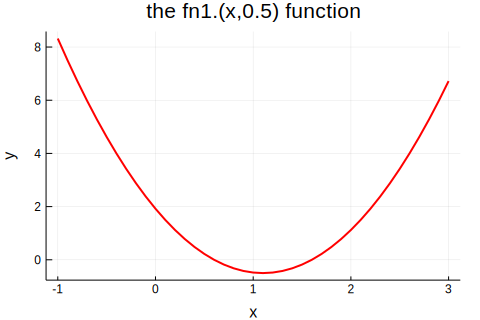

In [6]:
x = -1:0.1:3

p1 = plot(x,fn1.(x,0.5),color=:red,linewidth=2,legend=nothing)
title!("the fn1.(x,0.5) function")
xlabel!("x")
ylabel!("y")

The minimum appears to be around 1.1 and the two roots around 0.6 and 1.6.

# Solving a Non-Linear Equation

The Roots package wants a function with only one input. An easy way to turn ```fn1(a,0.5)``` into that form is by defining an anonymous function:
```
x->fn1(x,0.5)
```

Running 
```
find_zero(x->fn1(x,0.5),(x₀,x₁))
```
searches for a root in the [x₀,x₁] interval. Alternatively, you can also do 
```
find_zero(x->fn1(x,0.5),x₂)
``` 
where `x₂` is a single starting guess.

Instead, running
```
find_zeros(x->fn1(x,0.5),x₀,x₁)
```
searches for all roots between x₀ and x₁. (Notice the *s* in `find_zeros`.)

If you want to solve a *system* of non-linear equations, try the NLsolve.jl package.

In [7]:
x1 = find_zero(x->fn1(x,0.5),(-1,1))            #searches for roots in [-1,1]
printlnPs("at which x is fn1(x,0.5) = 0? ",x1)

x2 = find_zero(x->fn1(x,0.5),2)              #searches for roots around 2
printlnPs("at which x is fn1(x,0.5) = 0? ",x2)

println("\nyes, there are several roots. Just look at it (in the plot)")

at which x is fn1(x,0.5) = 0?      0.600
at which x is fn1(x,0.5) = 0?      1.600

yes, there are several roots. Just look at it (in the plot)


In [8]:
x1 = find_zeros(x->fn1(x,0.5),-1,3)            #find_zeros (notice the "s")
                                                    
printlnPs("at which x is fn1(x,0.5) = 0? ",x1)       

at which x is fn1(x,0.5) = 0?      0.600     1.600


# Optimization with One Choice Variable

Running 
```
Sol = optimize(x->fn1(x,0.5),x₀,x₁)
```
finds the `x` value (in the interval `[x₀,x₁]`) that *minimizes* `fn1(x,0.5)`.

The output (`Sol`) contains a lot of information. Print it to see, and extract the optimal `x` value as in the cell below.

In [9]:
Sol = optimize(x->fn1(x,0.5),-2.0,3.0)            

printlnPs("The minimum is at: ", Optim.minimizer(Sol))
println("Compare with the plot above")   

The minimum is at:      1.100
Compare with the plot above


In [10]:
println(Sol)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-2.000000, 3.000000]
 * Minimizer: 1.100000e+00
 * Minimum: -5.000000e-01
 * Iterations: 5
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 6


# Optimization with Several Choice Variables

The function `fn2(x,0.05)` (defined below) takes a vector `x` as input. Therefore, running 
```
Sol = optimize(x->fn2(x,0.5),x₀)
```
finds the `x` vector that *minimizes* `fn2(x,0.5)`. Notice that `x₀` should be a vector of floating point numbers  with the correct number of elements (for instance, `[1.0,-0.5]`).

In [11]:
function fn2(x,c)                    #notice: x is a vector
   L = (x[1]-2)^2 + (4*x[2]+3)^2 - c
  return L
end  

fn2 (generic function with 1 method)

In [12]:
x1 = 0:0.1:4                      #a grid of values
x2 = -2:0.05:0
(m,n) = (length(x1),length(x2)) 

L = fill(NaN,m,n)                 #the fn2(x,0.5) value at a grid (to the plot)
for i = 1:m, j = 1:n
    L[i,j] = fn2([x1[i],x2[j]],0.5)
end

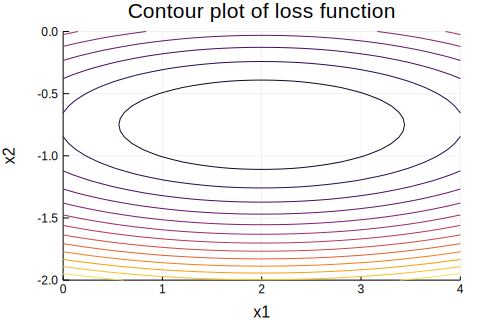

In [13]:
p1 =contour(x1,x2,copy(L'),legend=false)         #notice the transpose: L'
title!("Contour plot of loss function")
xlabel!("x1")
ylabel!("x2")

In [14]:
Sol2 = optimize(x->fn2(x,0.5),[1.0,-0.5])    

printlnPs("The minimum is at : ", Optim.minimizer(Sol2))
println("Compare with the contour plot above")   

The minimum is at :      2.000    -0.750
Compare with the contour plot above
